In [1]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc

,CodeL,CodeM,CodeS,TL_Name,lat,lon,etc,sep,geometry
0,GI(경기/인천),GI01(주문/볼음도),GI01-1,볼음도 영뜰 갯벌,37_39_33,126_11_13,기본,홀수해,POINT (126.18694 37.65917)
1,GI(경기/인천),GI01(주문/볼음도),GI01-1,볼음도 영뜰 갯벌,37_38_27,126_10_23,기본,홀수해,POINT (126.17306 37.64083)
2,GI(경기/인천),GI01(주문/볼음도),GI01-1,볼음도 영뜰 갯벌,37_37_21,126_9_33,기본,홀수해,POINT (126.15917 37.62250)
3,GI(경기/인천),GI01(주문/볼음도),GI01-2,주문도 뒷장술 갯벌,37_37_58,126_14_19,기본,홀수해,POINT (126.23861 37.63278)
4,GI(경기/인천),GI01(주문/볼음도),GI01-2,주문도 뒷장술 갯벌,37_37_17,126_13_31,기본,홀수해,POINT (126.22528 37.62139)
...,...,...,...,...,...,...,...,...,...
547,JJ(제주),JJ01(하도/종달리),JJ01-1,제주도 하도리 갯벌,33_30_45.7,126_53_59.1,기본,짝수해,POINT (126.89975 33.51269)
548,JJ(제주),JJ01(하도/종달리),JJ01-1,제주도 하도리 갯벌,33_30_46.1,126_54_1.3,기본,짝수해,POINT (126.90036 33.51281)
549,JJ(제주),JJ01(하도/종달리),JJ01-2,제주도 종달리 갯벌,33_29_2,126_54_11,기본,짝수해,POINT (126.90306 33.48389)
550,JJ(제주),JJ01(하도/종달리),JJ01-2,제주도 종달리 갯벌,33_29_2,126_54_23,기본,짝수해,POINT (126.90639 33.48389)


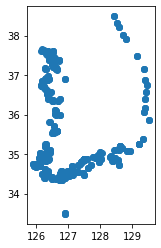

In [6]:
raw = gpd.read_file('./Ex/211226/1.국가해양생태계조사정점도(raw)/1.갯벌생태 조사정점도.shp', encoding='euckr')
raw.columns = ['CodeL', 'CodeM', 'CodeS', 'TL_Name', 'lat', 'lon', 'etc', 'sep' ,'geometry']
raw.plot()
raw

In [7]:
#좌표계 정보까지 넣어줌 
raw2 = raw.set_crs(4326, allow_override=True)
raw2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [79]:
#shp 파일로 저장
raw2.to_file('./result/ex2.shp', encoding='euckr')

In [8]:
raw_sl = gpd.read_file('./Ex/211226/1.국가해양생태계조사정점도(raw)/해저지형 (1분_유효값)/해저지형(1min)_유효값.csv', encoding='euckr')
raw_sl

,LAYER,ELEVATION,MIN1,SA1,MIN3,SA3,AVG_ELEV_M,MODE_ELE_M,STD_DEV__M,geometry
0,Unknown Area Type,-68.00000000000,GR9_F3G24_U1,1,GR3_F3G24_U,1,-67.92300000000,-67.90000000000,0.05257890000,None
1,Unknown Area Type,-68.00000000000,GR9_F3G24_U4,1,GR3_F3G24_U,1,-67.99700000000,-68.00000000000,0.01084260000,None
2,Unknown Area Type,-68.00000000000,GR9_F3G24_U7,1,GR3_F3G24_U,1,-68.00000000000,-68.00000000000,0.00000000000,None
3,Unknown Area Type,-68.00000000000,GR9_F3G42_A1,1,GR3_F3G42_A,1,-68.00000000000,-68.00000000000,0.00000000000,None
4,Unknown Area Type,-68.00000000000,GR9_F3G42_A4,1,GR3_F3G42_A,1,-68.00000000000,-68.00000000000,0.00000000000,None
...,...,...,...,...,...,...,...,...,...,...
133321,Unknown Area Type,-313.03000000000,GR9_G2J33_P4,1,GR3_G2J33_P,1,-310.48300000000,-313.00000000000,1.70206000000,None
133322,Unknown Area Type,-307.59500000000,GR9_G2J33_P7,1,GR3_G2J33_P,1,-306.29300000000,-306.90000000000,0.60126700000,None
133323,Unknown Area Type,-305.27500000000,GR9_G2J33_U1,1,GR3_G2J33_U,1,-304.05600000000,-305.00000000000,0.81934600000,None
133324,Unknown Area Type,-302.52800000000,GR9_G2J33_U4,1,GR3_G2J33_U,1,-301.18800000000,-302.10000000000,0.86184200000,None


In [9]:
#1분격자 불러오기
MIN1_raw = gpd.read_file('./Ex/MIN1_DOWFSA_UTF8_mod/MIN1_DOWFSA_UTF8_mod.shp', encoding='euc-kr')  
MIN1 = MIN1_raw[['MIN1', 'geometry']]
MIN1

,MIN1,geometry
0,GR9_F1G11_A1,"POLYGON ((122.00000 39.00000, 122.01667 39.000..."
1,GR9_F1G11_A4,"POLYGON ((122.00000 38.98333, 122.01667 38.983..."
2,GR9_F1G11_A7,"POLYGON ((122.00000 38.96667, 122.01667 38.966..."
3,GR9_F1G11_F1,"POLYGON ((122.00000 38.95000, 122.01667 38.950..."
4,GR9_F1G11_F4,"POLYGON ((122.00000 38.93333, 122.01667 38.933..."
...,...,...
421195,GR9_K2G44_T6,"POLYGON ((134.98333 30.08333, 135.00000 30.083..."
421196,GR9_K2G44_T9,"POLYGON ((134.98333 30.06667, 135.00000 30.066..."
421197,GR9_K2G44_Y3,"POLYGON ((134.98333 30.05000, 135.00000 30.050..."
421198,GR9_K2G44_Y6,"POLYGON ((134.98333 30.03333, 135.00000 30.033..."


In [10]:
raw_sl.columns
data_sl = raw_sl[['LAYER', 'ELEVATION', 'MIN1', 'SA1', 'MIN3', 'SA3', 'AVG_ELEV_M',
       'MODE_ELE_M', 'STD_DEV__M']]

<AxesSubplot:>

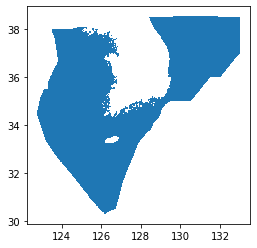

In [11]:
match = data_sl.merge(MIN1,on="MIN1")
match = match.set_geometry("geometry")
match.plot()


In [14]:
result1 = gpd.sjoin(raw2, match, how='left', op='within')
# ax =match.plot(color='black', alpha=0.2, figsize = (50,30))
# # match.boundary.plot(color='black',ax=ax, linewidth = 0.1)
# result1.plot(ax=ax,color='red', aspect=1)

# plt.show()

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

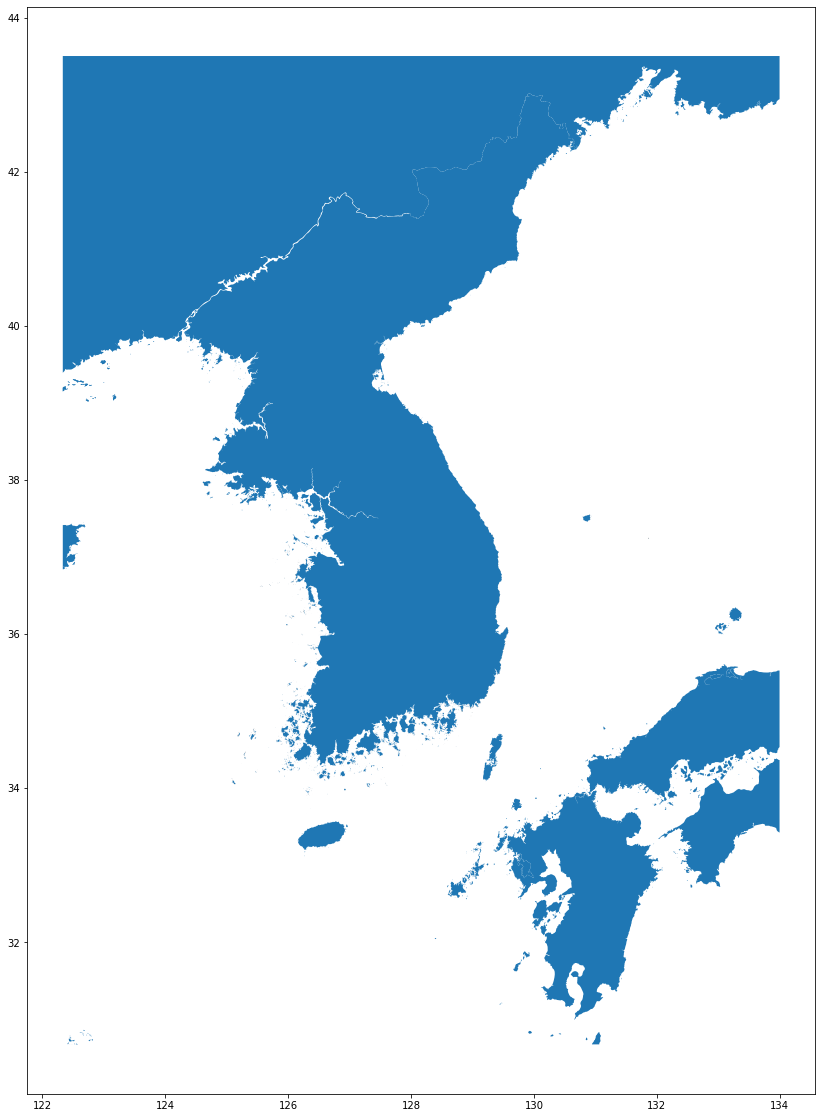

In [12]:
coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')  
coastline.plot(figsize=(20,20))
coastline.crs

In [15]:
result1 = result1.astype({'ELEVATION' : 'float'})
result1.dtypes

CodeL            object
CodeM            object
CodeS            object
TL_Name          object
lat              object
lon              object
etc              object
sep              object
geometry       geometry
index_right     float64
LAYER            object
ELEVATION       float64
MIN1             object
SA1              object
MIN3             object
SA3              object
AVG_ELEV_M       object
MODE_ELE_M       object
STD_DEV__M       object
dtype: object

In [16]:
result1['ELEVATION2'] = -result1['ELEVATION'] 

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geoplot\geoplot.py:623: UserWarning: Cannot set "figsize" when passing an "ax" to the plot. To remove this warning omit the "figsize" parameter.
  warnings.warn(
C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geoplot\geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


<AxesSubplot:>

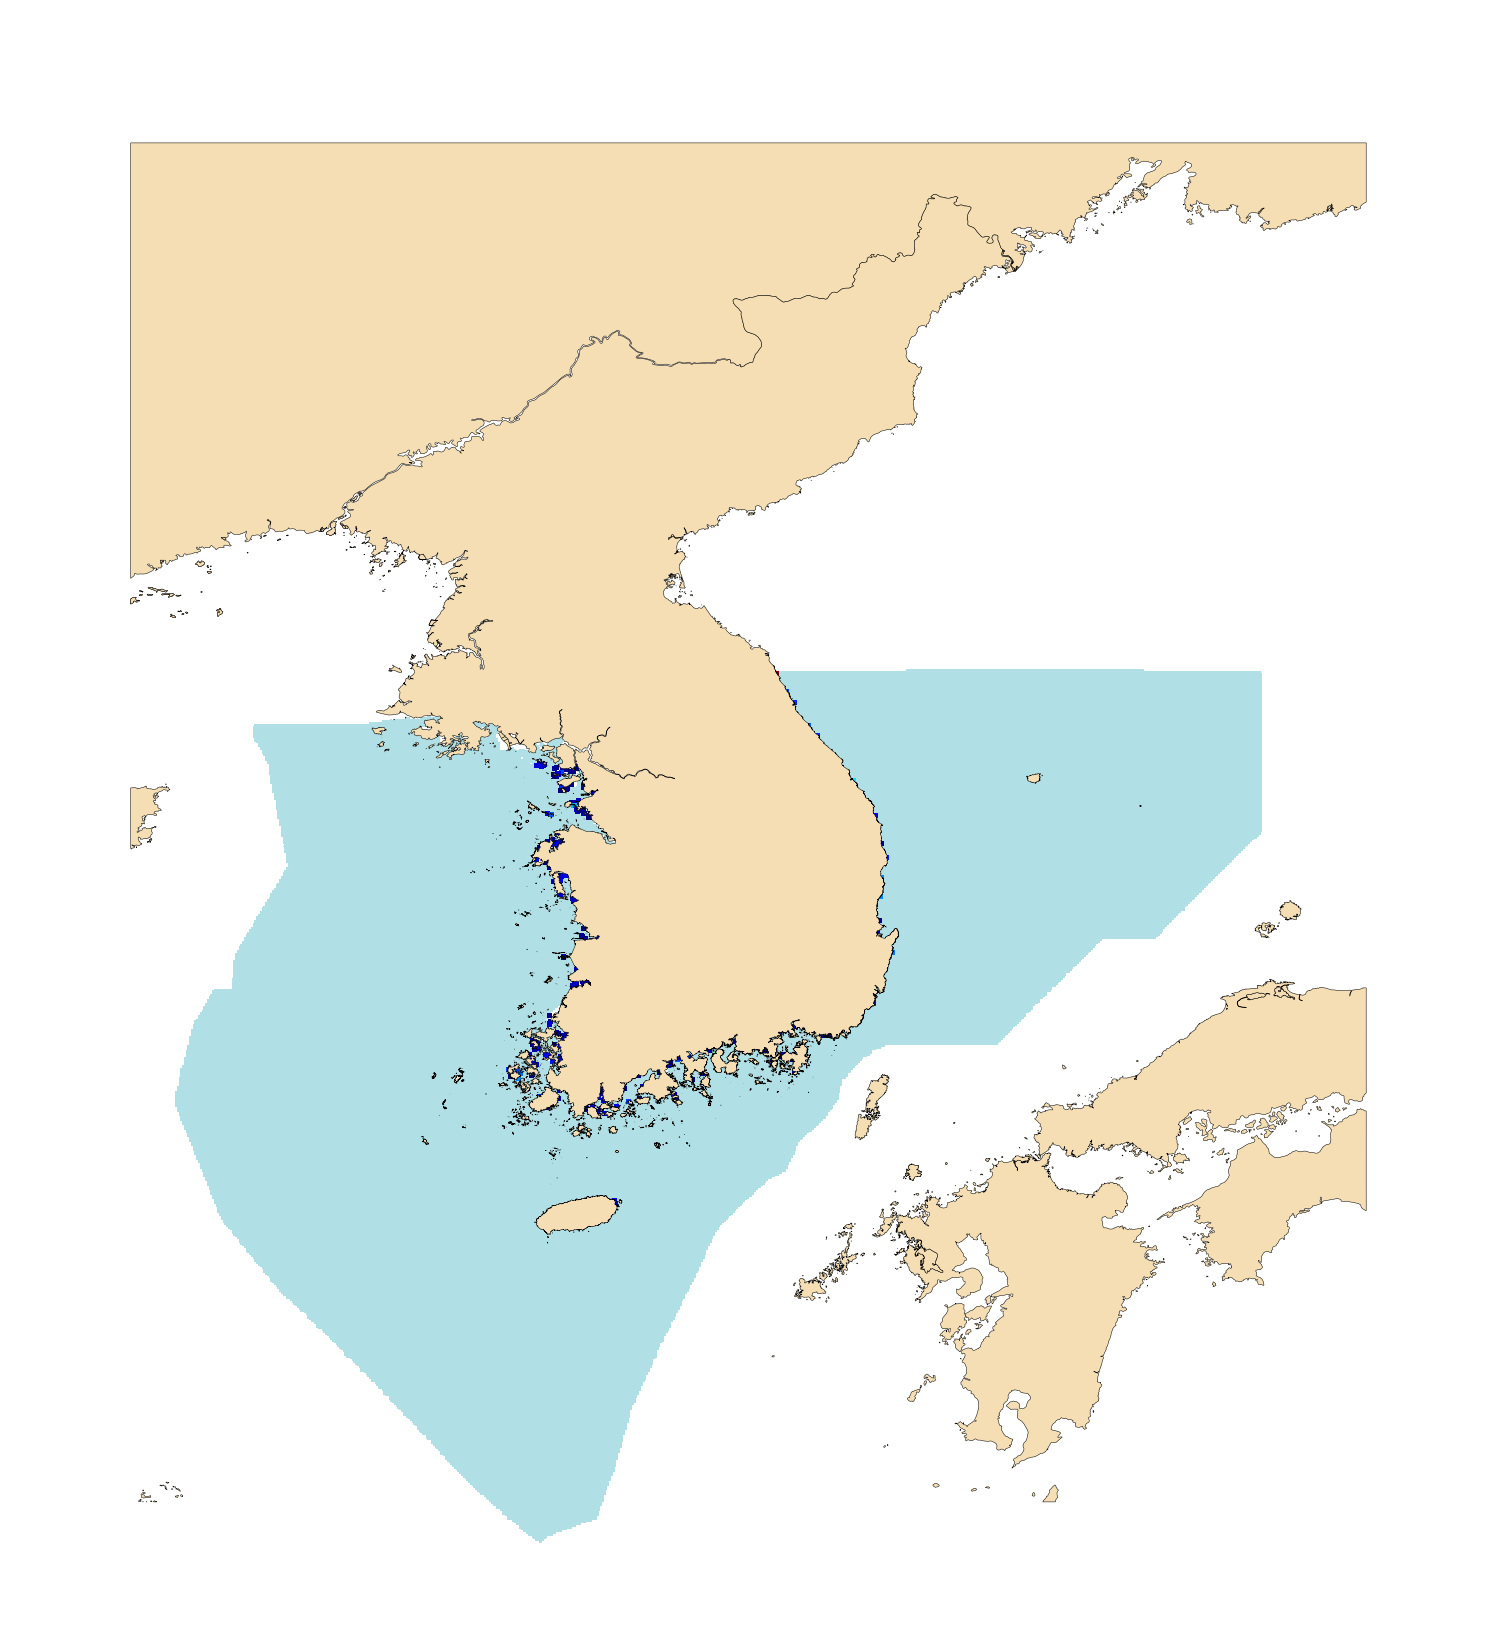

In [25]:
# ax =gplt.polyplot(match, figsize=(50, 30),facecolor='powderblue', edgecolor='powderblue',linewidth=0)
ax = match.plot(figsize=(50, 30),facecolor='powderblue', edgecolor='powderblue',linewidth=0)
gplt.pointplot(result1, hue = 'ELEVATION2',cmap ='jet',  linewidth=0, marker='s' , figsize=(50, 30), ax=ax)
# result1.plot(ax=ax,color='red', aspect=1)
gplt.polyplot(coastline, facecolor='wheat', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)



# ax =match.plot(color='black', alpha=0.2, figsize = (50,30))
# # match.boundary.plot(color='black',ax=ax, linewidth = 0.1)
# result1.plot(ax=ax,color='red', aspect=1)

<AxesSubplot:>

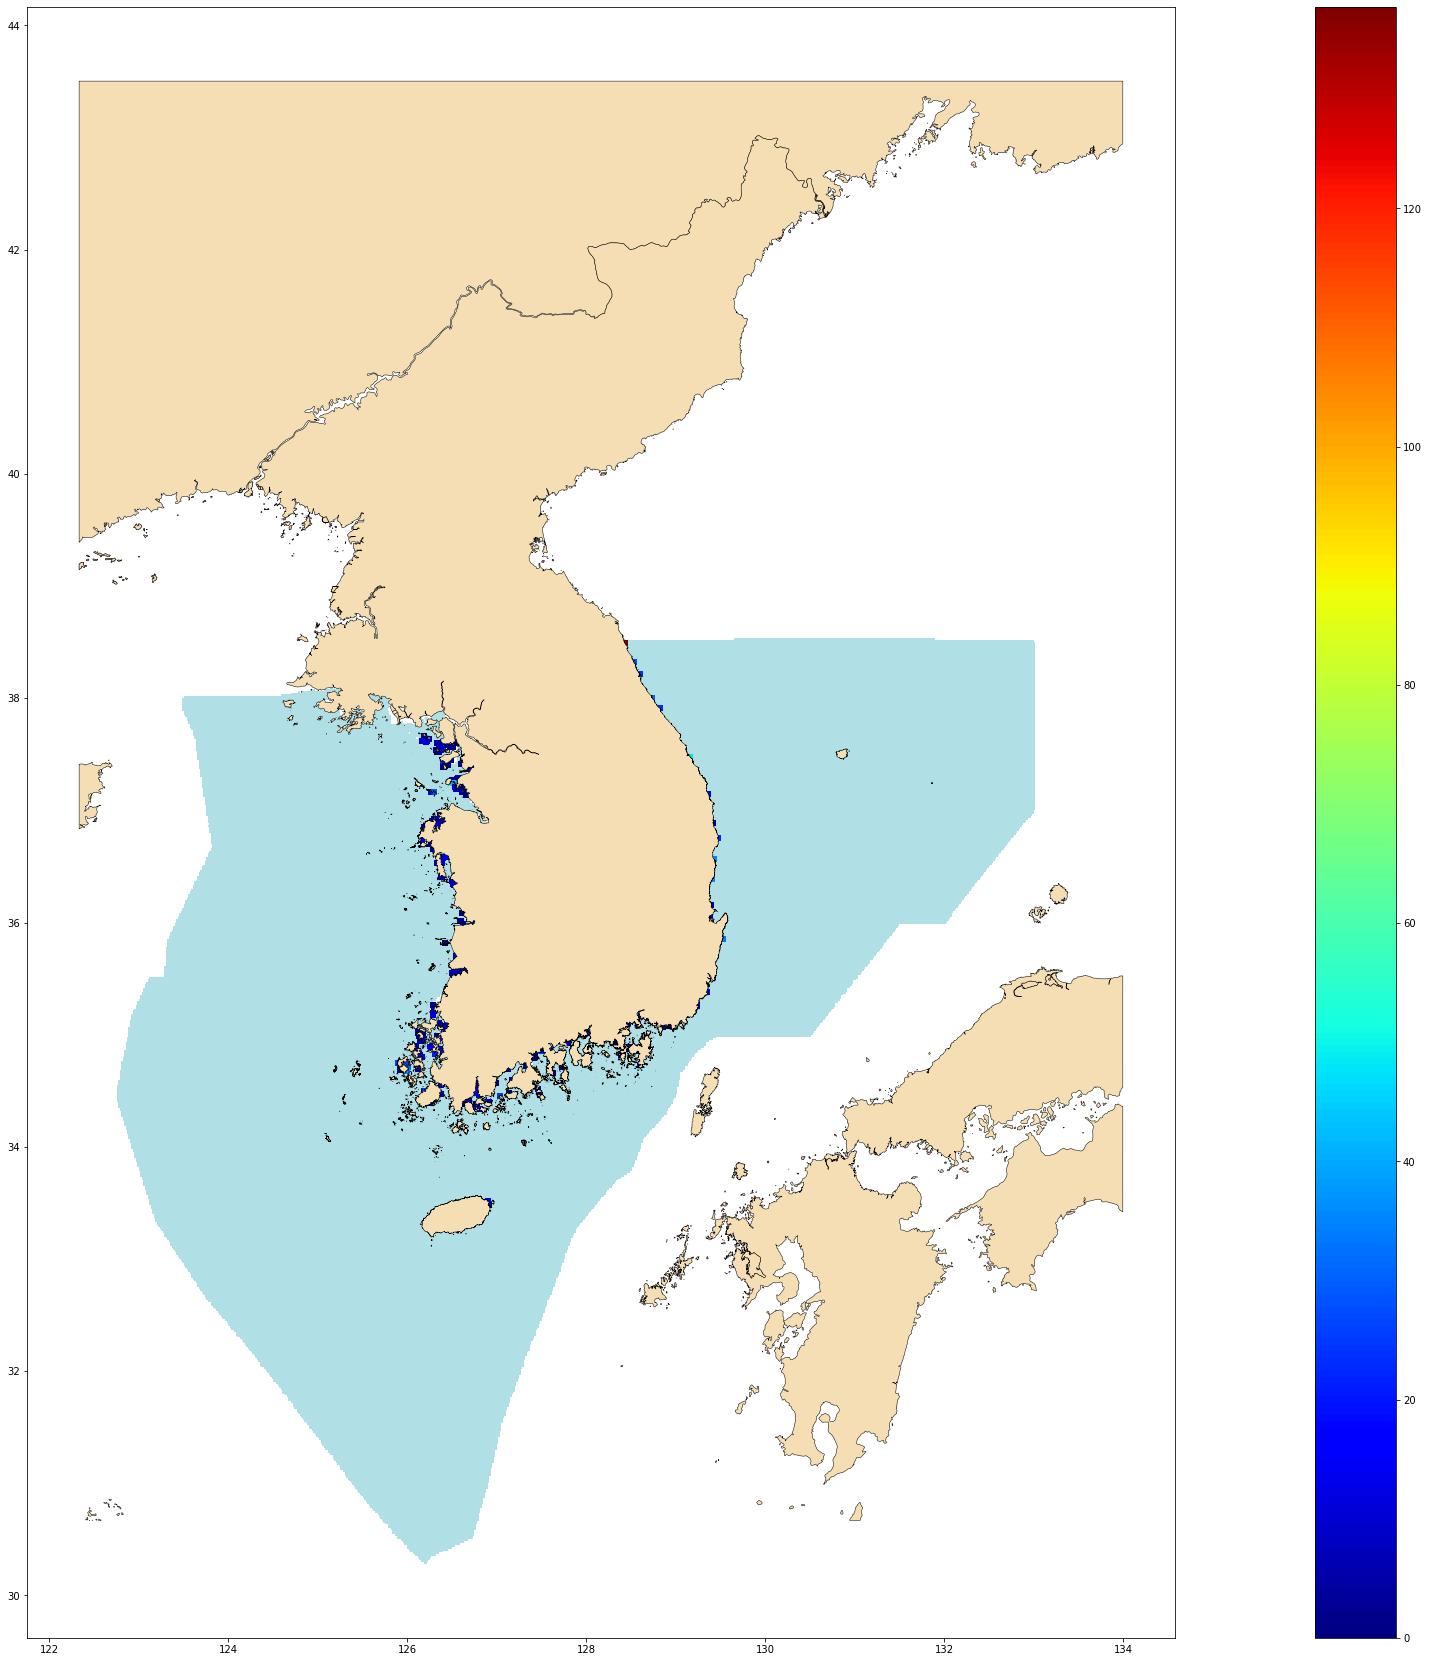

In [35]:
# scheme = mc.FisherJenks(result1['ELEVATION2'], k=10)
# scheme =mc.Quantiles(result1['ELEVATION2'], k=10)
ax = match.plot(figsize=(50, 30),facecolor='powderblue', edgecolor='powderblue',linewidth=0)
result1.plot('ELEVATION2', cmap = 'jet', linewidth=0, marker='s' ,k=10, figsize=(50, 30), ax=ax, legend=True)
coastline.plot(facecolor='wheat', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)
# gplt.pointplot(result1, hue = 'ELEVATION2',cmap ='jet',  linewidth=0, marker='s' , figsize=(50, 30), ax=ax)
# result1.plot(ax=ax,color='red', aspect=1)
# gplt.polyplot(coastline, facecolor='wheat', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)

In [18]:
result1.to_file('./result/ex2_2.shp', encoding='euckr')

C:\Users\PPARK\AppData\Local\Temp/ipykernel_4056/3499136233.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex2_2.shp', encoding='euckr')


In [21]:
result1

,CodeL,CodeM,CodeS,TL_Name,lat,lon,etc,sep,geometry,index_right,LAYER,ELEVATION,MIN1,SA1,MIN3,SA3,AVG_ELEV_M,MODE_ELE_M,STD_DEV__M,ELEVATION2
0,GI(경기/인천),GI01(주문/볼음도),GI01-1,볼음도 영뜰 갯벌,37_39_33,126_11_13,기본,홀수해,POINT (126.18694 37.65917),65657.0,Unknown Area Type,-0.887,GR9_F2K13_I9,1,GR3_F2K13_I,1,-0.88200000000,-0.90000000000,0.00320983000,0.887
1,GI(경기/인천),GI01(주문/볼음도),GI01-1,볼음도 영뜰 갯벌,37_38_27,126_10_23,기본,홀수해,POINT (126.17306 37.64083),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GI(경기/인천),GI01(주문/볼음도),GI01-1,볼음도 영뜰 갯벌,37_37_21,126_9_33,기본,홀수해,POINT (126.15917 37.62250),64781.0,Unknown Area Type,-11.228,GR9_F2K13_N4,1,GR3_F2K13_N,1,-0.95900000000,0.00000000000,1.84710000000,11.228
3,GI(경기/인천),GI01(주문/볼음도),GI01-2,주문도 뒷장술 갯벌,37_37_58,126_14_19,기본,홀수해,POINT (126.23861 37.63278),66940.0,Unknown Area Type,-9.000,GR9_F2K13_O6,1,GR3_F2K13_O,1,-2.89700000000,0.00000000000,3.23925000000,9.000
4,GI(경기/인천),GI01(주문/볼음도),GI01-2,주문도 뒷장술 갯벌,37_37_17,126_13_31,기본,홀수해,POINT (126.22528 37.62139),66518.0,Unknown Area Type,-5.197,GR9_F2K13_O5,1,GR3_F2K13_O,1,-0.36300000000,0.00000000000,0.97228500000,5.197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,JJ(제주),JJ01(하도/종달리),JJ01-1,제주도 하도리 갯벌,33_30_45.7,126_53_59.1,기본,짝수해,POINT (126.89975 33.51269),79133.0,Unknown Area Type,-14.000,GR9_F4K24_W9,1,GR3_F4K24_W,1,-5.98800000000,0.00000000000,4.48019000000,14.000
548,JJ(제주),JJ01(하도/종달리),JJ01-1,제주도 하도리 갯벌,33_30_46.1,126_54_1.3,기본,짝수해,POINT (126.90036 33.51281),79337.0,Unknown Area Type,-14.812,GR9_F4K24_X7,1,GR3_F4K24_X,1,-4.67000000000,0.00000000000,4.39590000000,14.812
549,JJ(제주),JJ01(하도/종달리),JJ01-2,제주도 종달리 갯벌,33_29_2,126_54_11,기본,짝수해,POINT (126.90306 33.48389),79338.0,Unknown Area Type,-10.261,GR9_F4K42_D1,1,GR3_F4K42_D,1,-1.77300000000,0.00000000000,2.46407000000,10.261
550,JJ(제주),JJ01(하도/종달리),JJ01-2,제주도 종달리 갯벌,33_29_2,126_54_23,기본,짝수해,POINT (126.90639 33.48389),79338.0,Unknown Area Type,-10.261,GR9_F4K42_D1,1,GR3_F4K42_D,1,-1.77300000000,0.00000000000,2.46407000000,10.261
